<a href="https://www.kaggle.com/code/mohammedalhawti/overview-of-saudi-pro-league-transfers-data?scriptVersionId=157588669" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction 
The Saudi Pro League, a cornerstone of the Kingdom's sports sector, is not just a football league—it's a reflection of the ambitious goals set out in Saudi Vision 2030. This analysis of the league's player transfers provides a window into how sports can drive economic, social, and international advancements.

## Objectives

1-Player Analysis: 

Focuses on understanding player-related aspects within the league, such as the average age of players in different clubs and the most common positions they play. This helps in gaining insights into player demographics and roles.

2-Transfer Dynamics Analysis: 

Examines the patterns and trends in player transfers. This includes analyzing the direction of transfers (in or out), identifying the most active transfer periods (summer or winter), and determining the years with the highest transfer activities.

3-Geographical Analysis: 

Explores the geographical spread of clubs involved in player transfers, providing a global perspective of the league's reach and connections.

4-Financial Analysis: 

Concentrates on the economic aspect of the transfers, specifically identifying players with the highest transfer fees. This sheds light on the financial dynamics and high-value players in the league.

## First, import the necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

## import and exploer the data

In [2]:
spl=pd.read_csv('/kaggle/input/saudi-pro-league-transfers/saudi-pro-league-transfers.csv')
spl

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,country,club_involved_country
0,Al-Hilal SFC,Khaled Aziz,18.0,Defensive Midfield,Unknown,?,in,Summer,NaN,Saudi Professional League,2000,2000/2001,Saudi Arabia,Unknown
1,Al-Hilal SFC,Sami Al-Jaber,27.0,Centre-Forward,Wolves,loan transfer,out,Summer,NaN,Saudi Professional League,2000,2000/2001,Saudi Arabia,England
2,Al-Hilal SFC,Fahad Al-Ghesheyan,26.0,Right Winger,Al-Nassr,-,out,Summer,NaN,Saudi Professional League,2000,2000/2001,Saudi Arabia,Saudi Arabia
3,Al-Hilal SFC,Saleh Al-Salloumi,37.0,Goalkeeper,Retired,-,out,Summer,NaN,Saudi Professional League,2000,2000/2001,Saudi Arabia,Retired
4,Al-Hilal SFC,Elijah Litana,29.0,Centre-Back,Retired,-,out,Summer,NaN,Saudi Professional League,2000,2000/2001,Saudi Arabia,Retired
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8055,Khaleej FC,Mohammed Al-Sahli,32.0,Left Winger,Al-Batin,?,out,Summer,NaN,Saudi Professional League,2023,2023/2024,Saudi Arabia,Saudi Arabia
8056,Khaleej FC,Hisham Al-Dubais,21.0,Midfield,Al-Jabalain,loan transfer,out,Summer,NaN,Saudi Professional League,2023,2023/2024,Saudi Arabia,Saudi Arabia
8057,Khaleej FC,Izuchukwu Anthony,25.0,Centre-Back,Without Club,-,out,Summer,NaN,Saudi Professional League,2023,2023/2024,Saudi Arabia,Without Club
8058,Khaleej FC,Pedro Amaral,25.0,Left-Back,Without Club,-,out,Summer,NaN,Saudi Professional League,2023,2023/2024,Saudi Arabia,Without Club


In [3]:
spl.describe 

<bound method NDFrame.describe of          club_name         player_name   age            position  \
0     Al-Hilal SFC         Khaled Aziz  18.0  Defensive Midfield   
1     Al-Hilal SFC       Sami Al-Jaber  27.0      Centre-Forward   
2     Al-Hilal SFC  Fahad Al-Ghesheyan  26.0        Right Winger   
3     Al-Hilal SFC   Saleh Al-Salloumi  37.0          Goalkeeper   
4     Al-Hilal SFC       Elijah Litana  29.0         Centre-Back   
...            ...                 ...   ...                 ...   
8055    Khaleej FC   Mohammed Al-Sahli  32.0         Left Winger   
8056    Khaleej FC    Hisham Al-Dubais  21.0            Midfield   
8057    Khaleej FC   Izuchukwu Anthony  25.0         Centre-Back   
8058    Khaleej FC        Pedro Amaral  25.0           Left-Back   
8059   Al-Fateh SC     Christian Cueva  32.0  Attacking Midfield   

     club_involved_name                      fee transfer_movement  \
0               Unknown                        ?                in   
1        

In [4]:
spl.dtypes

club_name                 object
player_name               object
age                      float64
position                  object
club_involved_name        object
fee                       object
transfer_movement         object
transfer_period           object
fee_cleaned              float64
league_name               object
year                       int64
season                    object
country                   object
club_involved_country     object
dtype: object

# Cleaing the data from null values 

In [5]:
# Display the count of missing values for each column.
missing_values_count = spl.isnull().sum()
missing_values_count

club_name                   0
player_name                 0
age                       116
position                    0
club_involved_name          0
fee                        14
transfer_movement           0
transfer_period             0
fee_cleaned              5623
league_name                 0
year                        0
season                      0
country                     0
club_involved_country       0
dtype: int64

In [6]:
# Fill missing values in the 'spl' DataFrame with zeros.
spl.fillna(0) 

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,country,club_involved_country
0,Al-Hilal SFC,Khaled Aziz,18.0,Defensive Midfield,Unknown,?,in,Summer,0.0,Saudi Professional League,2000,2000/2001,Saudi Arabia,Unknown
1,Al-Hilal SFC,Sami Al-Jaber,27.0,Centre-Forward,Wolves,loan transfer,out,Summer,0.0,Saudi Professional League,2000,2000/2001,Saudi Arabia,England
2,Al-Hilal SFC,Fahad Al-Ghesheyan,26.0,Right Winger,Al-Nassr,-,out,Summer,0.0,Saudi Professional League,2000,2000/2001,Saudi Arabia,Saudi Arabia
3,Al-Hilal SFC,Saleh Al-Salloumi,37.0,Goalkeeper,Retired,-,out,Summer,0.0,Saudi Professional League,2000,2000/2001,Saudi Arabia,Retired
4,Al-Hilal SFC,Elijah Litana,29.0,Centre-Back,Retired,-,out,Summer,0.0,Saudi Professional League,2000,2000/2001,Saudi Arabia,Retired
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8055,Khaleej FC,Mohammed Al-Sahli,32.0,Left Winger,Al-Batin,?,out,Summer,0.0,Saudi Professional League,2023,2023/2024,Saudi Arabia,Saudi Arabia
8056,Khaleej FC,Hisham Al-Dubais,21.0,Midfield,Al-Jabalain,loan transfer,out,Summer,0.0,Saudi Professional League,2023,2023/2024,Saudi Arabia,Saudi Arabia
8057,Khaleej FC,Izuchukwu Anthony,25.0,Centre-Back,Without Club,-,out,Summer,0.0,Saudi Professional League,2023,2023/2024,Saudi Arabia,Without Club
8058,Khaleej FC,Pedro Amaral,25.0,Left-Back,Without Club,-,out,Summer,0.0,Saudi Professional League,2023,2023/2024,Saudi Arabia,Without Club


In [7]:
# Convert the 'age' column in the 'spl' DataFrame to numeric values.
# Set errors='coerce' to handle non-numeric values by converting them to NaN.
spl.age = pd.to_numeric(spl.age, errors='coerce')

# Fill NaN values (caused by non-numeric entries) with 0.
spl.age = spl.age.fillna(0)

# Convert the 'age' column to 64-bit integer data type (np.int64).
spl.age = spl.age.astype(np.int64)


In [8]:
spl.dtypes

club_name                 object
player_name               object
age                        int64
position                  object
club_involved_name        object
fee                       object
transfer_movement         object
transfer_period           object
fee_cleaned              float64
league_name               object
year                       int64
season                    object
country                   object
club_involved_country     object
dtype: object

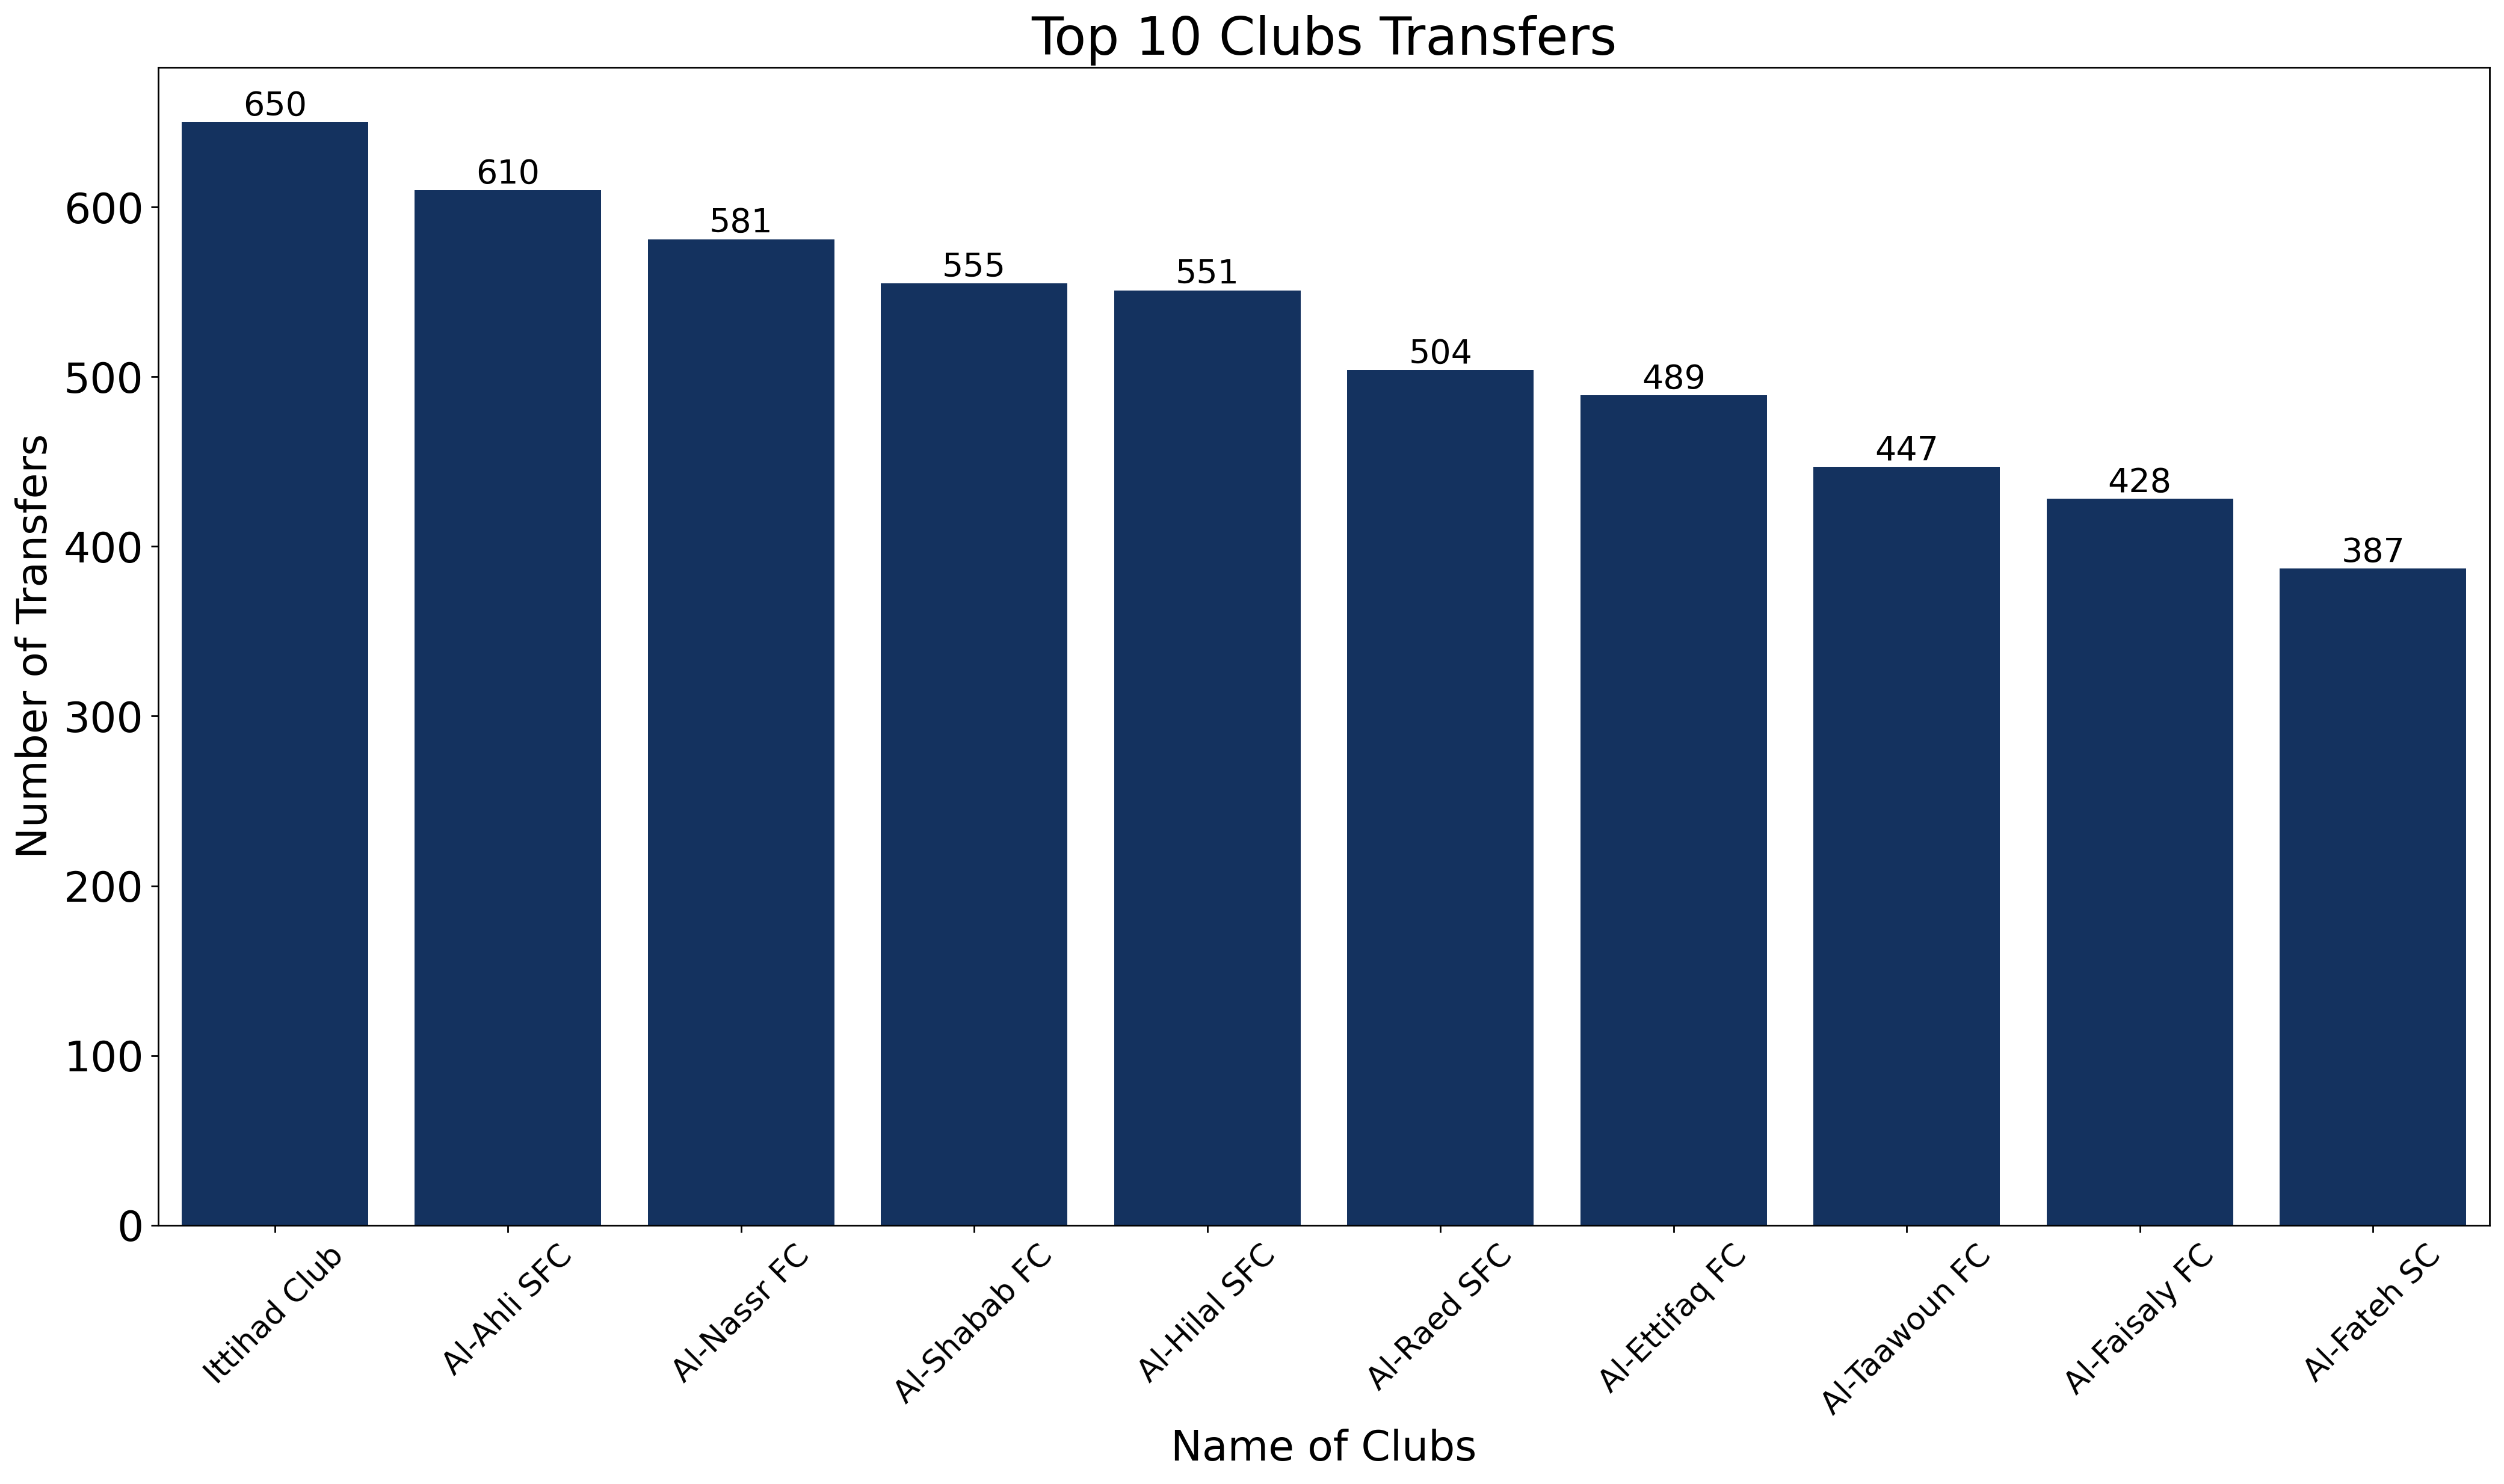

In [9]:

# Set the figure size and resolution
plt.figure(figsize=(20, 10), dpi=250)

# Get the top 10 clubs with the highest number of transfers
Top_Clubs = spl['club_name'].value_counts().head(10)

# Define the colors for the bars using a color palette
bar_colors = sns.color_palette("Blues", len(Top_Clubs), as_cmap=True)

# Create a bar plot
ax = sns.barplot(x=Top_Clubs.index, y=Top_Clubs, palette=bar_colors(Top_Clubs.values))

# Add labels to the bars
ax.bar_label(ax.containers[0], fontsize=16)

# Customize the x and y-axis labels and tick labels
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=20)

# Set the x and y-axis labels and the plot title
plt.xlabel("Name of Clubs", fontsize=20)
plt.ylabel("Number of Transfers", fontsize=20)
plt.title("Top 10 Clubs Transfers", fontsize=25)

# Show the plot
plt.show()


# What is the age mean of players for each club ?

In [10]:
#change age column from float to intger to get the mean 
spl.age = pd.to_numeric(spl.age, errors='coerce').fillna(0).astype(np.int64)

In [11]:
# Calculate the average age of players for each club using groupby and mean functions
club_name_age = spl.groupby('club_name', as_index=False)['age'].mean() .sort_values(by="age")
club_name_age

,club_name,age
23,Al-Watani,23.500000
29,Najran SC,23.508929
14,Al-Okhdood Club,24.904762
16,Al-Qadsiah FC,24.912587
12,Al-Nahdah FC,25.000000
18,Al-Riyadh SC,25.422222
2,Al-Ahli SFC,25.442623
11,Al-Hilal SFC,25.464610
6,Al-Ettifaq FC,25.498978
26,Hajer Club,25.572581


<Figure size 18000x18000 with 0 Axes>

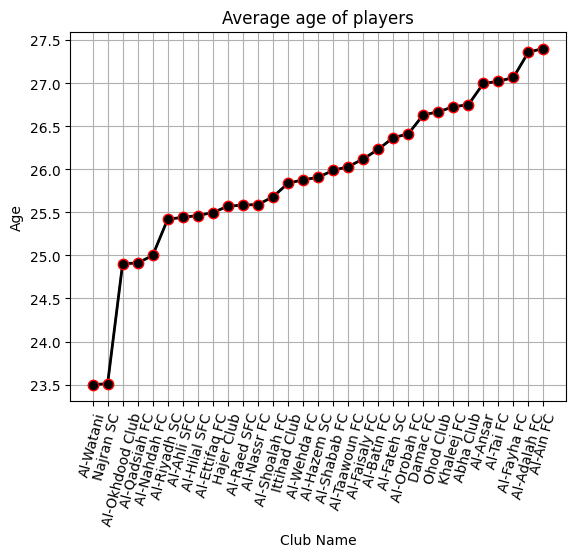

In [12]:
# Extract data for the x-axis (club names) and y-axis (average ages)
x = club_name_age['club_name']
y = club_name_age['age']

# Create a new figure with a specified size and DPI
plt.figure(figsize=(60, 60), dpi=300)

# Create a subplot within the figure
fig, ax = plt.subplots()

# Plot a line chart of the data points
ax.plot(x, y)

# Customize the line chart appearance
plt.plot(x, y, label='1x', color='black', linewidth=2, marker='.', linestyle='-', markersize=15, markeredgecolor='red')

# Customize the x-axis labels with font size and rotation
plt.xticks(fontsize=10, rotation=75)

# Customize the y-axis labels with font size
plt.yticks(fontsize=10)

# Add grid lines to the plot
ax.grid()

# Set the x-axis label, y-axis label, and plot title
ax.set(xlabel='Club Name', ylabel='Age', title='Average age of players')

# Display the plot
plt.show()


# What are most frequent positions ?

In [13]:
# Create a DataFrame 'position_counts' to store the count of each position
position_counts = pd.DataFrame({'count': spl['position'].value_counts()}).reset_index()
position_counts.columns = ['position', 'count']
position_counts

,position,count
0,Centre-Forward,1438
1,Centre-Back,1091
2,Defensive Midfield,809
3,Attacking Midfield,635
4,Right-Back,622
5,Goalkeeper,592
6,Left-Back,569
7,Central Midfield,473
8,Right Winger,413
9,Left Winger,386


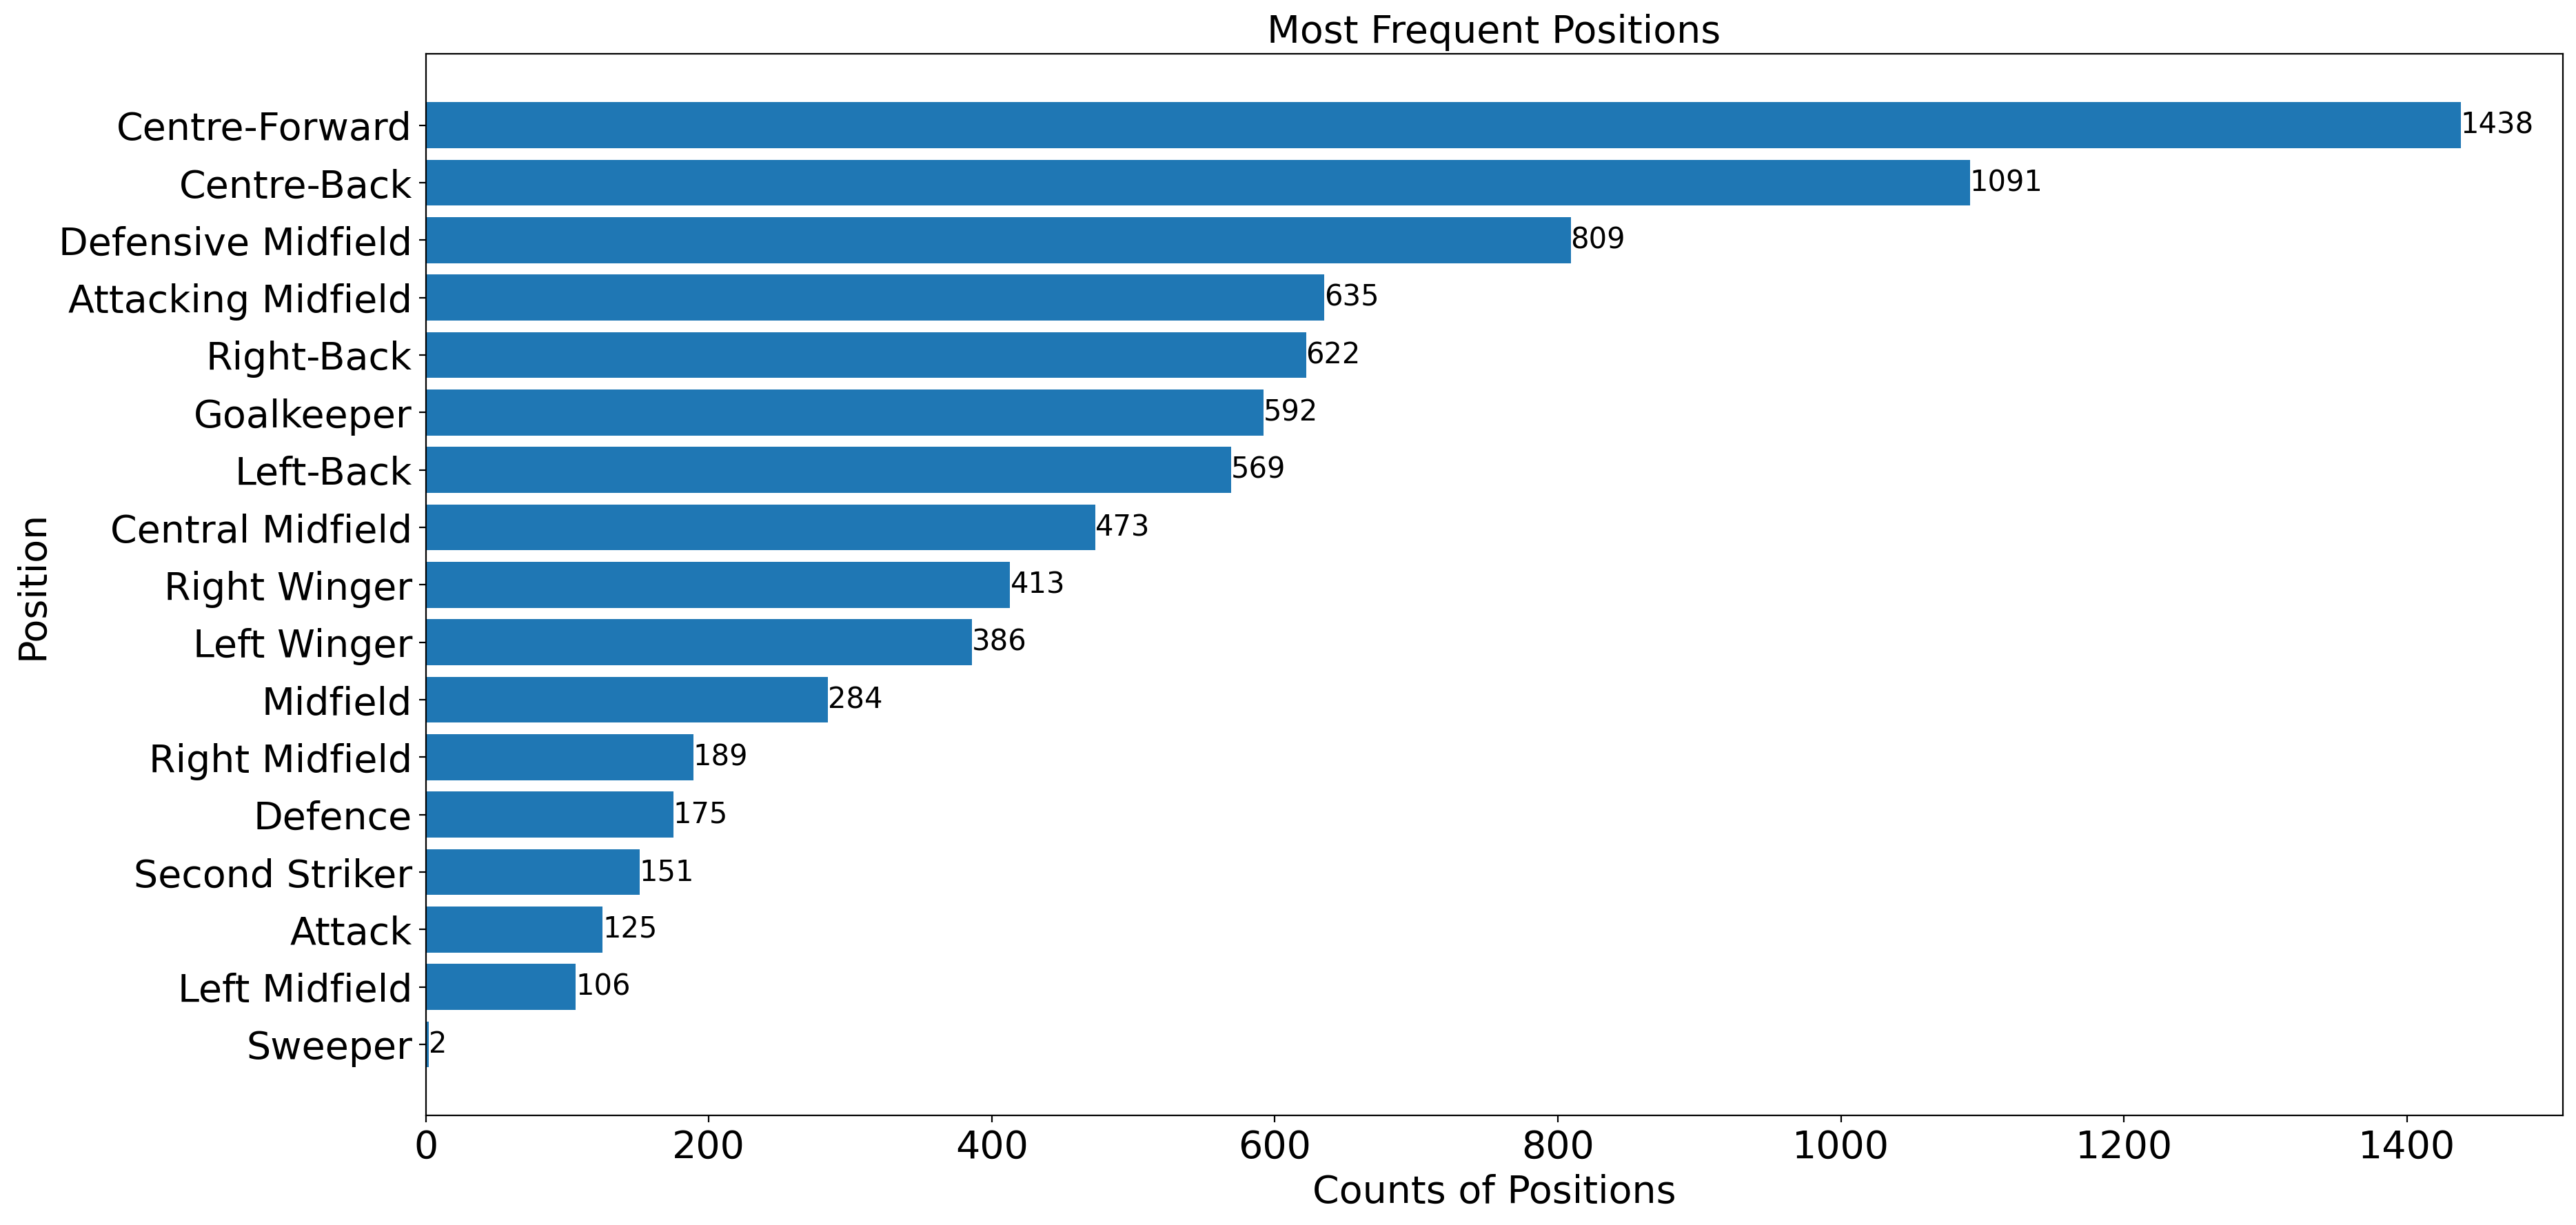

In [14]:
# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(20, 10), dpi=200)

# Plot the horizontal bars
bars = ax.barh(position_counts['position'], position_counts['count'], align='center')

# Invert the y-axis to display the most frequent position at the top
ax.invert_yaxis()

# Set labels for the x and y axes, and adjust their font sizes
ax.set_xlabel('Counts of Positions',fontsize=20)
ax.set_ylabel('Position',fontsize=20)

# Set font sizes for x and y tick labels
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Set the title of the plot with an adjusted font size
plt.title("Most Frequent Positions", fontsize=20)

# Add count values as text above the bars
for bar, count in zip(bars, position_counts['count']):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{count}', ha='left', va='center', fontsize=15)

# Display the plot
plt.show()


# What is the most In or Out transfer ?

In [15]:
# Create a DataFrame to count occurrences of 'transfer_movement'
transfer_movement_counts =  pd.DataFrame({'count': spl['transfer_movement'].value_counts()}).reset_index()
transfer_movement_counts.columns = ['transfer_movement', 'count']
transfer_movement_counts

,transfer_movement,count
0,in,4103
1,out,3957


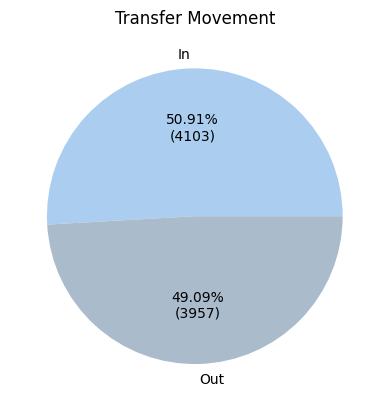

In [16]:
# Filter the 'count' values where 'transfer_movement' is 'in'
in_counts = transfer_movement_counts['count'].loc[transfer_movement_counts['transfer_movement'] == 'in']

# Filter the 'count' values where 'transfer_movement' is 'out'
out_counts = transfer_movement_counts['count'].loc[transfer_movement_counts['transfer_movement'] == 'out']

# Calculate the total counts for 'in' and 'out' movements
total_in = in_counts.sum()
total_out = out_counts.sum()

# Define labels for the pie chart
labels = ['In', 'Out']

# Define colors for the pie chart segments
colors = ['#abcdef', '#aabbcc']

# Create a pie chart with labels, colors, and percentage format
plt.pie([total_in, total_out], labels=labels, colors=colors, autopct=lambda p: '{:.2f}%\n({:d})'.format(p, int(round(p * (total_in + total_out) / 100))))

# Set the title of the pie chart
plt.title('Transfer Movement')

# Display the pie chart
plt.show()


# What is the most transfer period , summer or winter?

In [17]:
# Create a DataFrame 'transfer_period_counts' with counts of each'transfer_period'
transfer_period_counts =  pd.DataFrame({'count': spl['transfer_period'].value_counts()}).reset_index()
transfer_period_counts.columns = ['transfer_period', 'count']
transfer_period_counts

,transfer_period,count
0,Summer,6261
1,Winter,1799


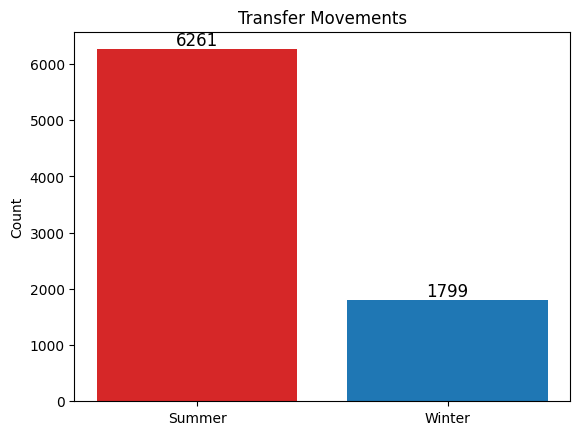

In [18]:
# Define the 'transfer_period_counts' and 'counts' lists
transfer_period_counts = ['Summer', 'Winter']
counts = [6261, 1799]

# Define the 'bar_labels' for color
bar_labels = ['red', 'blue']

# Define 'bar_colors' for bar colors
bar_colors = ['tab:red', 'tab:blue']

# Create a figure and axis
fig, ax = plt.subplots()

# Create the bar chart with 'transfer_period_counts' on the x-axis and 'counts' on the y-axis
bars = ax.bar(transfer_period_counts, counts, color=bar_colors)

# Set the y-label and title
ax.set_ylabel('Count')
ax.set_title('Transfer Movements')

# Add count values above the bars
for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{count}', ha='center', va='bottom', fontsize=12)

# Display the plot
plt.show()


# What is the year with the most player transfers ?

In [19]:
# Create a DataFrame 'year_count' with counts of values in the 'year' column
year_count = pd.DataFrame({'count': spl['year'].value_counts()}).reset_index()
year_count.columns = ['year', 'count']
year_count

,year,count
0,2019,741
1,2018,720
2,2017,600
3,2015,585
4,2023,556
5,2021,554
6,2016,531
7,2020,508
8,2022,503
9,2014,424


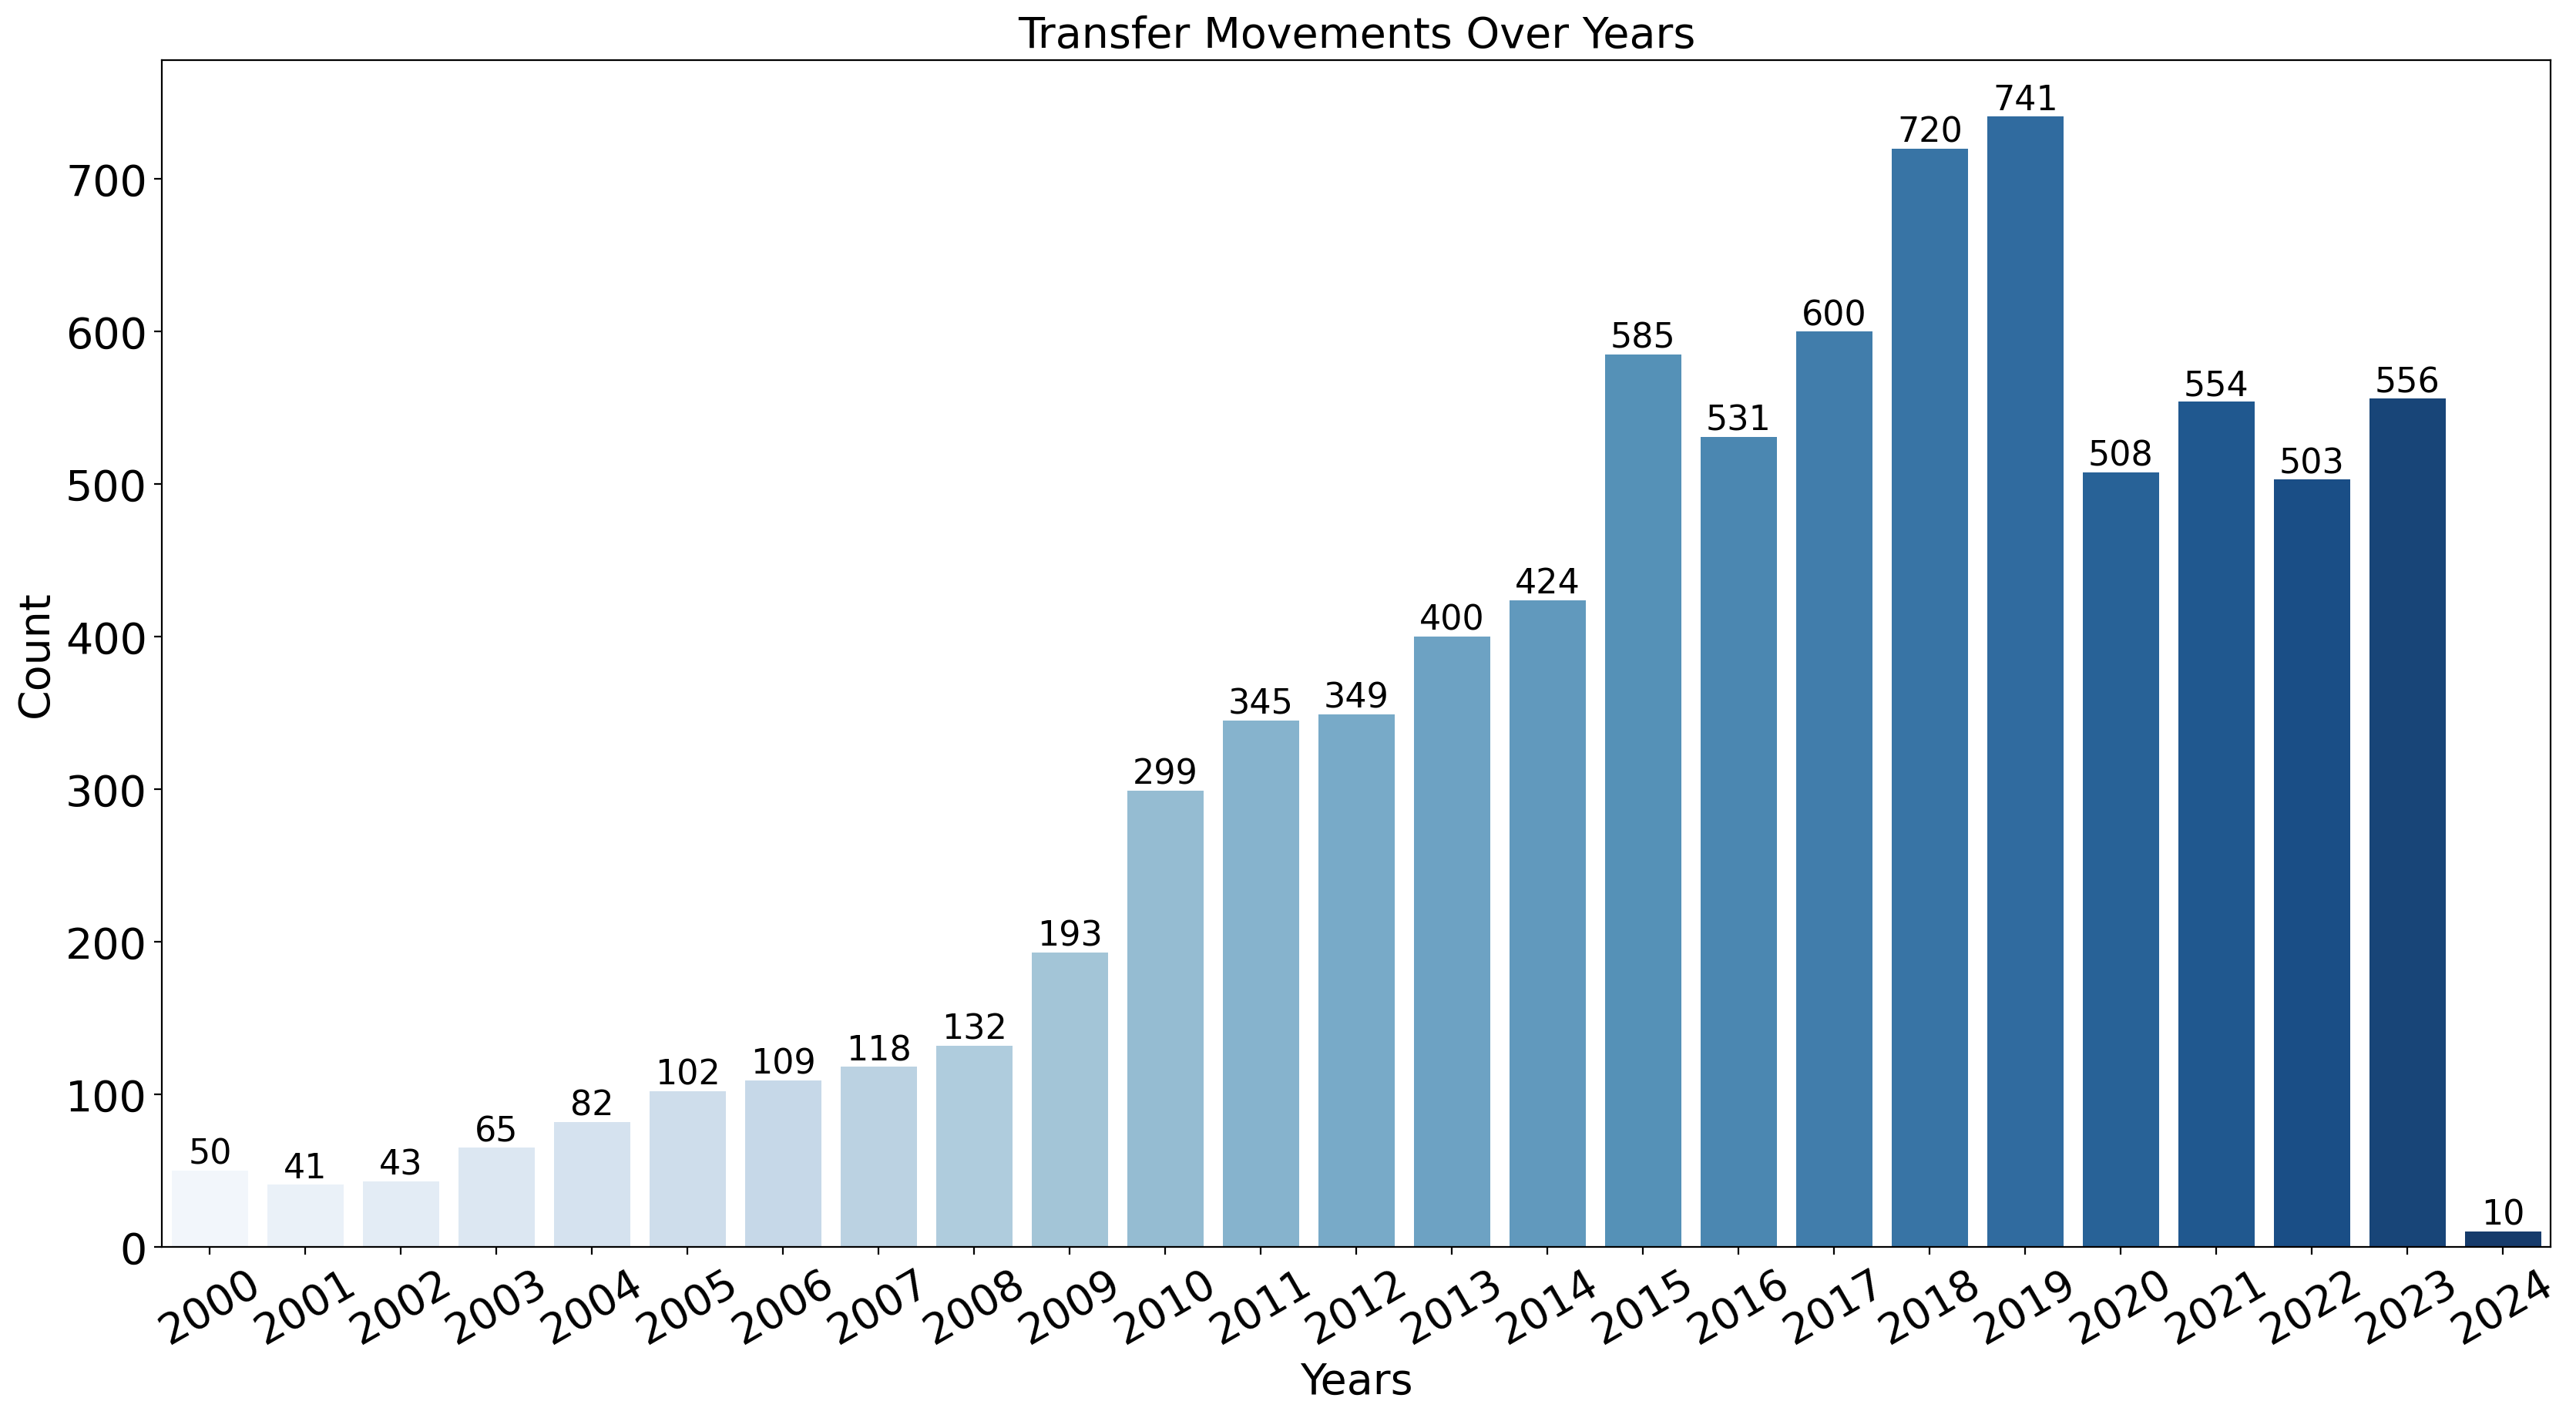

In [20]:
# Set the figure size and DPI for the plot
plt.figure(figsize=(20, 10), dpi=200)

# Count the occurrences of each unique year in the 'year' column of the DataFrame
Years_count = spl['year'].value_counts()[:]

# Create a color palette for the bars using the "Blues" colormap
bar_colors = sns.color_palette("Blues", len(Years_count))

# Create a bar plot with years on the x-axis and their corresponding counts on the y-axis
ax = sns.barplot(x=Years_count.index, y=Years_count, palette=bar_colors)

# Add labels to the bars with fontsize 16
ax.bar_label(ax.containers[0], fontsize=16)

# Customize the appearance of the plot
plt.xticks(fontsize=20, rotation=30)  # Set x-axis label font size and rotation
plt.yticks(fontsize=20)  # Set y-axis label font size
plt.ylabel("Count", fontsize=20)  # Set y-axis label
plt.xlabel("Years", fontsize=20)  # Set x-axis label
plt.title("Transfer Movements Over Years", fontsize=20)  # Set plot title

# Display the plot
plt.show()


# Geographical country distribution of involved clubs in the world

In [21]:
#Excluding Without Club, Unknown, Retired, (Saudi Arabia because it is outlier data)
club_involved_country_counts = pd.DataFrame({'count': spl.loc[~spl['club_involved_country'].isin(['Without Club', 'Unknown', 'Retired', 'Saudi Arabia' ])]['club_involved_country'].value_counts()}).reset_index()
club_involved_country_counts.columns = ['club_involved_country', 'count']
club_involved_country_counts

,club_involved_country,count
0,Brazil,273
1,Qatar,204
2,France,162
3,Portugal,128
4,Egypt,106
...,...,...
88,Latvia,1
89,Nigeria,1
90,Uzbekistan,1
91,Montenegro,1


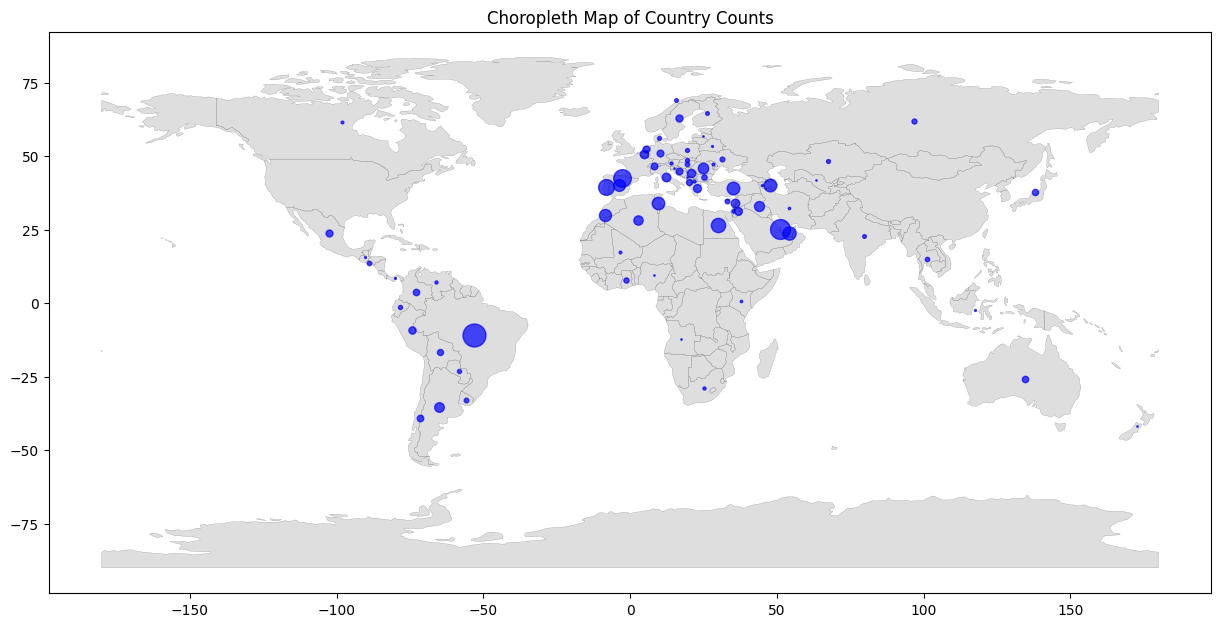

In [22]:
# Load world geometries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

club_involved_country_counts = club_involved_country_counts.rename(columns={'club_involved_country': 'name'})

# Merge the club_involved_country_counts with world
world = world.merge(club_involved_country_counts, how='left', left_on='name', right_on='name')

# Fill NaN values with 0 (for countries without additional data)
world['count'] = world['count'].fillna(0)

# Plot the GeoDataFrame with choropleth
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.set_title('Choropleth Map of Country Counts')

# Plot choropleth map based on 'count' column
world.plot(column='count', edgecolor='#A5A5A5', color='#DEDEDE', legend=True, ax=ax, linewidth=0.1,
           legend_kwds={'label': "Country Counts", 'orientation': "horizontal"})

# Scatter plot dots based on 'count'
for x, y, count in zip(world.geometry.centroid.x, world.geometry.centroid.y, world['count']):
    ax.scatter(x, y, s=count, color='blue', alpha=0.7)

# Highlight countries with data in 'club_involved_country' with a black boundary
highlighted_countries = world[world['count'].notna()]
highlighted_countries.boundary.plot(ax=ax, linewidth=0.1, color='black', alpha=0.5)

plt.show()


# Who are the top 10 players with the highest transfer fees in the Saudi Pro League ?

In [23]:
# Redefining the cleaning function with consideration for the '€' sign and then 'm' or 'k'

def clean_fee_euro_only(value):
    if isinstance(value, str) and '€' in value:
        if 'm' in value.lower():
            num_value = ''.join(filter(str.isdigit, value))
            return float(num_value) * 1e6
        elif 'k' in value.lower():
            num_value = ''.join(filter(str.isdigit, value))
            return float(num_value) * 1e3
    return 0


# Apply the cleaning function to the 'fee' column in 'spl'
spl['fee_cleaned'] = spl['fee'].apply(clean_fee_euro_only)

# Sort 'spl' in descending order based on the cleaned 'fee' column
spl = spl.sort_values(by='fee_cleaned', ascending=False)

# Display the first few rows of the sorted 'spl' DataFrame
spl.head(10)


,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,country,club_involved_country
7650,Al-Hilal SFC,Neymar,31,Left Winger,Paris SG,€90.00m,in,Summer,9.000000e+09,Saudi Professional League,2023,2023/2024,Saudi Arabia,France
7915,Al-Nassr FC,Otávio,28,Right Winger,FC Porto,€60.00m,in,Summer,6.000000e+09,Saudi Professional League,2023,2023/2024,Saudi Arabia,Portugal
7651,Al-Hilal SFC,Malcom,26,Right Winger,Zenit S-Pb,€60.00m,in,Summer,6.000000e+09,Saudi Professional League,2023,2023/2024,Saudi Arabia,Russia
7652,Al-Hilal SFC,Rúben Neves,26,Defensive Midfield,Wolves,€55.00m,in,Summer,5.500000e+09,Saudi Professional League,2023,2023/2024,Saudi Arabia,England
7942,Al-Hilal SFC,Aleksandar Mitrovic,28,Centre-Forward,Fulham,€52.60m,in,Summer,5.260000e+09,Saudi Professional League,2023,2023/2024,Saudi Arabia,England
7594,Ittihad Club,Fabinho,29,Defensive Midfield,Liverpool,€46.70m,in,Summer,4.670000e+09,Saudi Professional League,2023,2023/2024,Saudi Arabia,England
7856,Al-Ahli SFC,Gabri Veiga,21,Central Midfield,Celta de Vigo,€40.00m,in,Summer,4.000000e+09,Saudi Professional League,2023,2023/2024,Saudi Arabia,Spain
7653,Al-Hilal SFC,Sergej Milinković-Savić,28,Central Midfield,Lazio,€40.00m,in,Summer,4.000000e+09,Saudi Professional League,2023,2023/2024,Saudi Arabia,Italy
7494,Al-Ahli SFC,Riyad Mahrez,32,Right Winger,Man City,€35.00m,in,Summer,3.500000e+09,Saudi Professional League,2023,2023/2024,Saudi Arabia,England
7619,Al-Nassr FC,Sadio Mané,31,Left Winger,Bayern Munich,€30.00m,in,Summer,3.000000e+09,Saudi Professional League,2023,2023/2024,Saudi Arabia,Germany


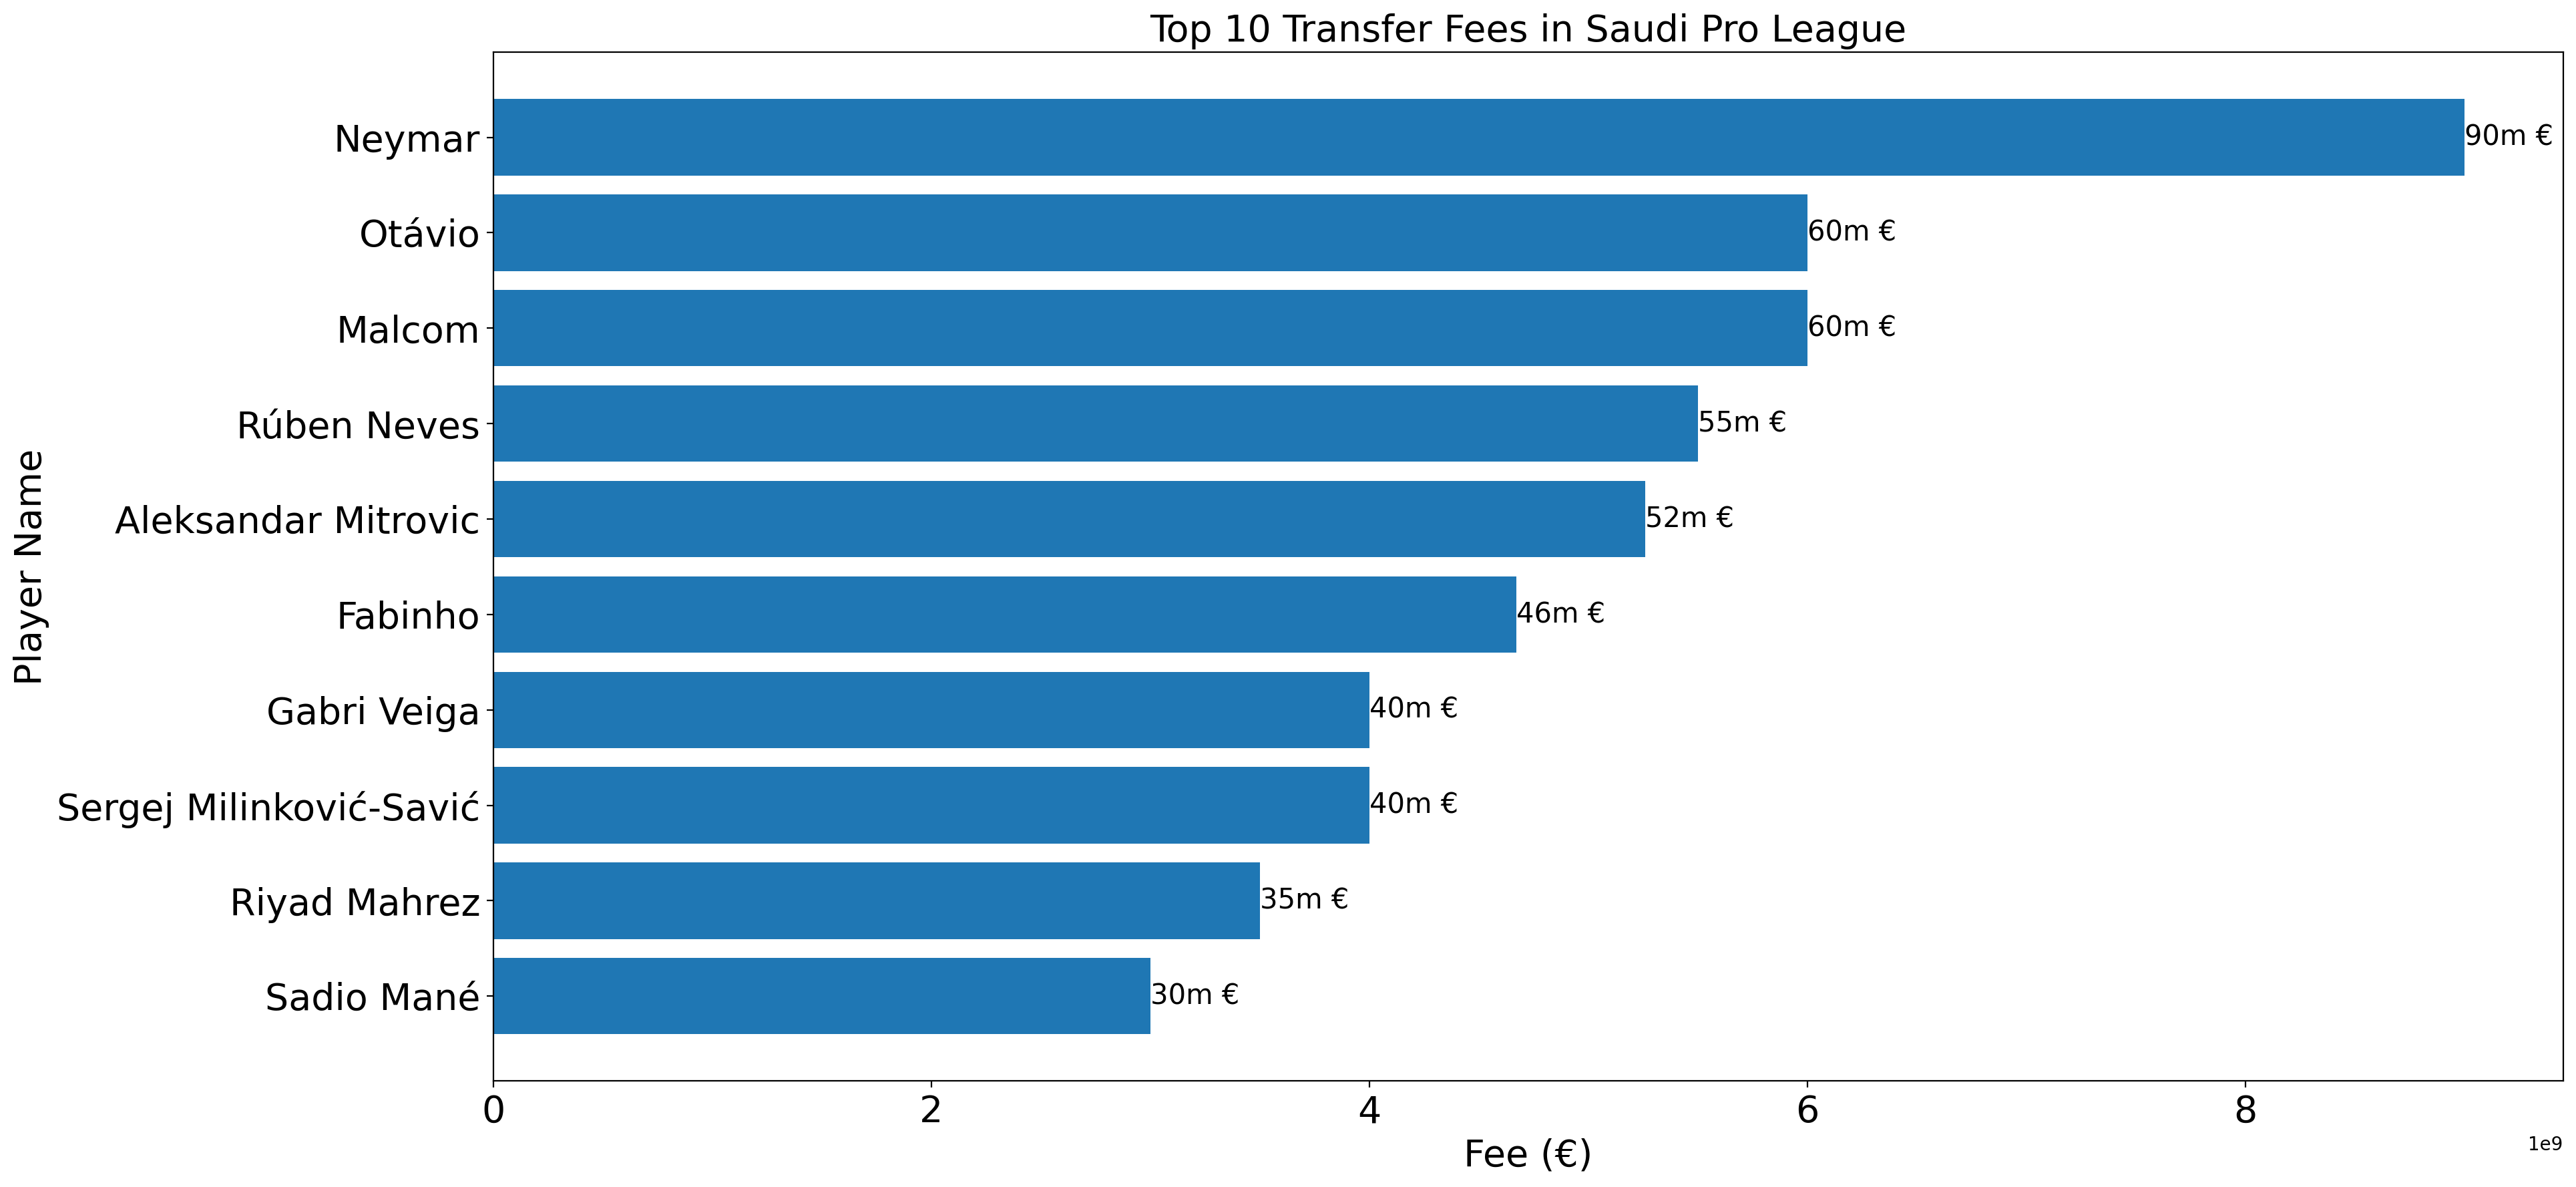

In [24]:

# Use the top 10 entries for the plot
spl_top10 = spl.head(10)

# Creating the plot
fig, ax = plt.subplots(figsize=(20, 10), dpi=200)

# Plot the horizontal bars
bars = ax.barh(spl_top10['player_name'], spl_top10['fee_cleaned'], align='center')

ax.invert_yaxis()  # Inverts the Y-axis
ax.set_xlabel('Fee (€)', fontsize=20)
ax.set_ylabel('Player Name', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Top 10 Transfer Fees in Saudi Pro League", fontsize=20)

# Add fee values above the bars, showing only the first two digits
for bar in bars:
    width = bar.get_width()
    # Format the fee to show only the first two digits
    fee_formatted = str(int(width))[:2]  # Convert to integer, then to string, and take first two characters
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{fee_formatted}m €', ha='left', va='center', fontsize=15)

plt.show()


# Conclusion

The Saudi Pro League, with its dynamic growth and international integration, stands as a beacon of Vision 2030's aspirations. It is more than a football league—it's a catalyst for economic diversification, social progress, and global connectivity.